In [0]:
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from google.colab import files
uploaded = files.upload()

Saving prsa.csv to prsa.csv


In [3]:
df = pd.read_csv('prsa.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
df['datetime'] = df[['year','month','day','hour']].apply(lambda row: datetime.datetime(year=row['year'],month=row['month'],day=row['day'],hour = row['hour']),axis=1)
df.sort_values('datetime',ascending=True,inplace=True)

In [0]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [0]:
df2 = df.drop(['No','year','month','day','hour'],axis=1)


In [6]:
df2.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


The pres column has the data on air pressure Lets draw a boxplot.

Text(0.5, 1.0, 'Box plot of Air Pressure')

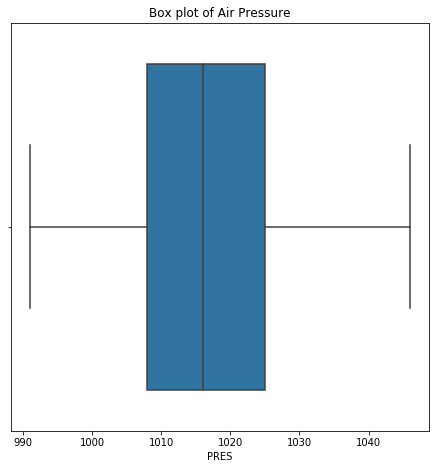

In [7]:
plt.figure(figsize=(7.5,7.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')

In [8]:
median = np.median(df['PRES'])
median


1016.0

The median is around 1016.0

In [9]:
q1 = np.percentile(df['PRES'],25)
q3 = np.percentile(df['PRES'],75)
print(q1," ",q3)

1008.0   1025.0


THe FIRST QUARILE = 1008.0
the third quartile =  1025.0

In [0]:
dataset = (df2['PRES'] - df2['PRES'].min())/(df2['PRES'].max() - df2['PRES'].min())

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1,1))

Now after rescaling we will be dividing our dataset into training set and test set.

In [12]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,0.490909


In [13]:
split_date = datetime.datetime(year=2014,month=1,day=1,hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of the training set : ',df_train.shape)
print('Shape of the test set : ',df_val.shape)

Shape of the training set :  (35064, 15)
Shape of the test set :  (8760, 15)


The train and validation time series of scaled_PRES is also shown below.

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled Air Pressure readings')

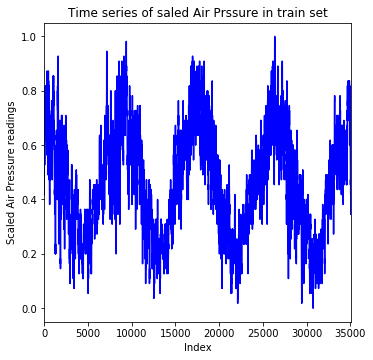

In [17]:
plt.figure(figsize =(5.5,5.5))
g = sns.tsplot(df_train['scaled_PRES'],color='b')
g.set_title('Time series of saled Air Prssure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')
#plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled Air Pressure readings')

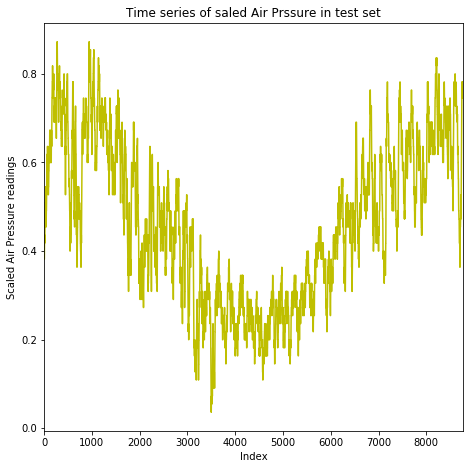

In [16]:
plt.figure(figsize =(7.5,7.5))
g = sns.tsplot(df_val['scaled_PRES'],color='y')
g.set_title('Time series of saled Air Prssure in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')
#plt.show()

In [0]:
#  Now we have to generate regressors(X) and target variable(y) for train and validation.A 2d array of regressors and 1-D array of target
#  is created from the original 1-D array of the scaled_PRES column in the DATAFRAMES.For the time series forecasting model, the past
#  seven days of observations are used to predict for the next day.This is equivalent to AR(7) model. WE defin a function that takes a time series
#  and returns the arrays of X and Y respectively.

In [0]:
def makeXy(ts , nb_timesteps):
  '''
  Input:
    ts : original time series
    nb_timesteps : number of time steps in the regressors
   Output:
   X: 2_D array of regressors
   y : 1-D array of target
  '''
  X = []
  y = []
  for i in range(nb_timesteps,ts.shape[0]):
    X.append(list(ts.loc(axis=0)[i-nb_timesteps:i-1]))
    y.append(ts.loc(axis=0)[i])
  X = np.array(X)
  y = np.array(y)
  return X,y

In [49]:
df_train['scaled_PRES'].iloc[0:7]

0    0.545455
1    0.527273
2    0.509091
3    0.509091
4    0.490909
5    0.472727
6    0.472727
Name: scaled_PRES, dtype: float64

In [69]:
X_train,y_train = makeXy(df_train['scaled_PRES'],7)
print('Shape of the training dataset : ',X_train.shape,y_train.shape)


Shape of the training dataset :  (35057, 7) (35057,)


In [0]:
k = df_val['scaled_PRES'].index.values
l = []
for i in range(k.shape[0]):
    l.append(i)
l = np.array(l)
df_val.index = l
X_val,y_val = makeXy(df_val['scaled_PRES'],7)
print('Shape of the validation dataset : ',X_val.shape,y_val.shape)


In [0]:
l = np.array(l)
df_val.index = l

In [81]:
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182
1,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
2,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
3,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
4,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818


In [83]:
X_val,y_val = makeXy(df_val['scaled_PRES'],7)
print('Shape of the validation dataset : ',X_val.shape,y_val.shape)

Shape of the validation dataset :  (8753, 7) (8753,)


In [0]:
# Now we define the MLP using the Keras functional API. In this approach, layers are declared and cascaded as input and 
# output of each other.

In [0]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [0]:
# The input layer is declared with shape (None, 7) and of type float32. None indicates the
# number of instances that is determined at runtime:
input_layer = Input(shape=(7,),dtype='float32')

In [88]:
# Dense layers are declared with linear activation:
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense3)
output_layer = Dense(1,activation='linear')(dropout_layer)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [92]:
ts_model = Model(inputs = input_layer,outputs = output_layer)
ts_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [93]:
'''
The model is trained by calling the fit function on the model object and passing the
X_train and y_train. The training is done for a predefined number of epochs.
Additionally, batch_size defines the number of samples of train set to be used for an
instance of backpropagation. The validation dataset is also passed to evaluate the model
after every epoch completes. A ModelCheckpoint object tracks the loss function on the
validation set and saves the model for the epoch at which the loss function has been
'''

'\nThe model is trained by calling the fit function on the model object and passing the\nX_train and y_train. The training is done for a predefined number of epochs.\nAdditionally, batch_size defines the number of samples of train set to be used for an\ninstance of backpropagation. The validation dataset is also passed to evaluate the model\nafter every epoch completes. A ModelCheckpoint object tracks the loss function on the\nvalidation set and saves the model for the epoch at which the loss function has been\n'

In [95]:
ts_model.fit(x = X_train,y=y_train,batch_size=16,epochs=100,verbose =1,validation_data=(X_val,y_val),shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/100
35057/35057 [==============================] - 3s 78us/step - loss: 7.5225e-04 - acc: 3.7082e-04 - val_loss: 2.8375e-04 - val_acc: 0.0000e+00
Epoch 2/100
35057/35057 [==============================] - 3s 76us/step - loss: 7.4543e-04 - acc: 3.7082e-04 - val_loss: 2.9939e-04 - val_acc: 0.0000e+00
Epoch 3/100
35057/35057 [==============================] - 3s 72us/step - loss: 7.5034e-04 - acc: 3.7082e-04 - val_loss: 2.4601e-04 - val_acc: 0.0000e+00
Epoch 4/100
35057/35057 [==============================] - 3s 73us/step - loss: 7.4323e-04 - acc: 3.7082e-04 - val_loss: 1.3499e-04 - val_acc: 0.0000e+00
Epoch 5/100
35057/35057 [==============================] - 3s 71us/step - loss: 7.4971e-04 - acc: 3.7082e-04 - val_loss: 1.3597e-04 - val_acc: 0.0000e+00
Epoch 6/100
35057/35057 [==============================] - 3s 72us/step - loss: 7.3365e-04 - acc: 3.7082e-04 - val_loss: 1.6346e-04 - val_acc: 0.0000e+00
Epoch 7/100
35057/35057 [==

In [0]:
preds = ts_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['PRES'].loc[7:],pred_PRES)
print('R-squared for the validation set : ',round(r2,4))

R-squared for the validation set :  0.9949


Text(0.5, 0, 'Index')

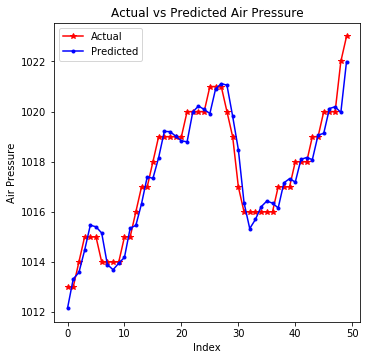

In [100]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
#plt.savefig('plots/ch5/B07887_05_05.png', format='png', dpi=300)

Text(0.5, 1.0, 'Box plot of pm2.5')

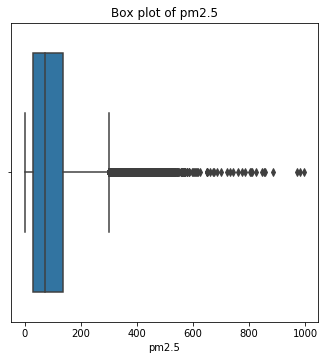

In [101]:
#Now we predict the values of pm2.5
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

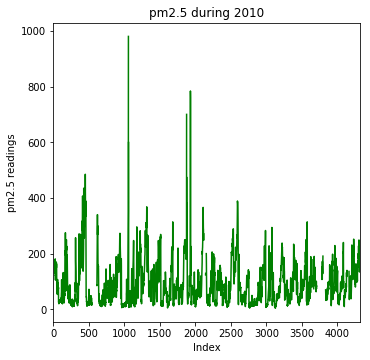

In [102]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,
month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

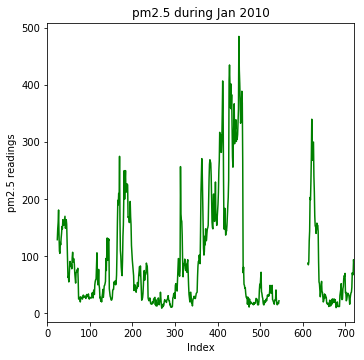

In [103]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,
month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

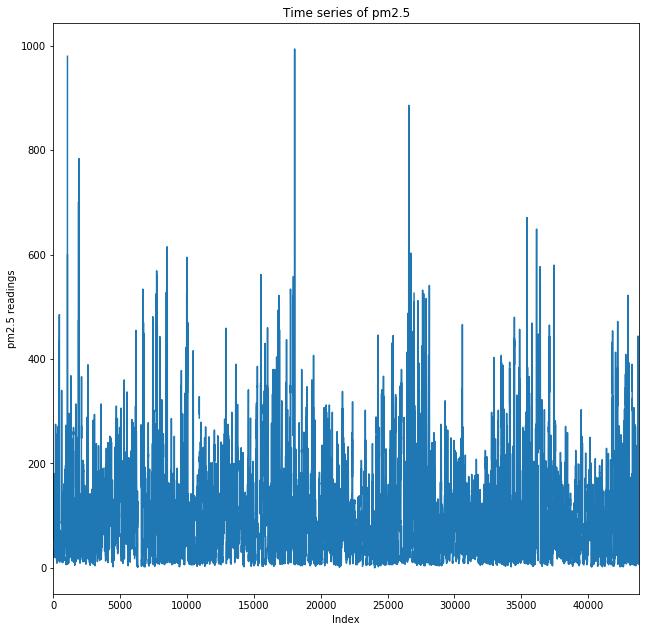

In [105]:
plt.figure(figsize=(10.5, 10.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')


In [115]:
new_df = df['pm2.5'].dropna()
new_df

24       129.0
25       148.0
26       159.0
27       181.0
28       138.0
29       109.0
30       105.0
31       124.0
32       120.0
33       132.0
34       140.0
35       152.0
36       148.0
37       164.0
38       158.0
39       154.0
40       159.0
41       164.0
42       170.0
43       149.0
44       154.0
45       164.0
46       156.0
47       126.0
48        90.0
49        63.0
50        65.0
51        55.0
52        65.0
53        83.0
         ...  
43794     79.0
43795     35.0
43796     26.0
43797     20.0
43798      8.0
43799     16.0
43800     10.0
43801     11.0
43802     20.0
43803      9.0
43804      8.0
43805      9.0
43806      8.0
43807      8.0
43808      8.0
43809      8.0
43810      7.0
43811     12.0
43812     17.0
43813     11.0
43814      9.0
43815     11.0
43816      8.0
43817      9.0
43818     10.0
43819      8.0
43820     10.0
43821     10.0
43822      8.0
43823     12.0
Name: pm2.5, Length: 41757, dtype: float64

In [0]:

scaler = MinMaxScaler(feature_range=(0,1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1,1))
split_date = datetime.datetime(year=2014,month=1,day=1,hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of the training set : ',df_train.shape)
print('Shape of the test set : ',df_val.shape)

In [111]:
X_train,y_train = makeXy(df_train['scaled_pm2.5'],7)
print('Shape of the training dataset : ',X_train.shape,y_train.shape)


Shape of the training dataset :  (35057, 7) (35057,)


In [0]:
k = new_df.index.values
l = []
for i in range(k.shape[0]):
    l.append(i)
l = np.array(l)
new_df.index = l


In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
new_df['scaled_pm2.5'] = scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [134]:
#new_df = new_df.drop('scaled_pm2.5',axis=0)
new_df.head()

0    129
1    148
2    159
3    181
4    138
Name: pm2.5, dtype: object

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       41747, 41748, 41749, 41750, 41751, 41752, 41753, 41754, 41755, 41756],
      dtype='object', length=41757)

In [139]:
#rescaling
min1 = new_df.min()
max1 = new_df.max()
new_df1 = (new_df - min1)/(max1 - min1)
new_df1.head()


0    0.129779
1    0.148893
2     0.15996
3    0.182093
4    0.138833
Name: pm2.5, dtype: object

In [0]:
X_train = []
Y_train = []
for i in range(7,new_df1.shape[0]):
  X_train.append(new_df1[i-7:i])
  Y_train.append(new_df1[i])
  

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [159]:
print("The shape of training dataset is : ",X_train.shape,Y_train.shape)

The shape of training dataset is :  (41750, 7) (41750,)


In [0]:
X_train1 = X_train[0:35750]
Y_train1 = Y_train[0:35750]
X_val = X_train[35750:]
Y_val = Y_train[35750:]

In [175]:
Y_train1

array([0.12474849, 0.12072435, 0.13279678, ..., 0.10462777, 0.08450704,
       0.04225352])

In [176]:
X_val.shape

(6000, 7)

In [0]:
input_layer = Input(shape=(7,), dtype='float32')
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)
dropout_layer = Dropout(0.2)(dense3)
output_layer = Dense(1, activation='linear')(dropout_layer)
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')

In [178]:
ts_model.fit(x = X_train,y=Y_train,batch_size=16,epochs=100,verbose =1,validation_data=(X_val,Y_val),shuffle=True)

Train on 41750 samples, validate on 6000 samples
Epoch 1/100
41750/41750 [==============================] - 4s 96us/step - loss: 0.0175 - val_loss: 0.0121
Epoch 2/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0162 - val_loss: 0.0123
Epoch 3/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0160 - val_loss: 0.0109
Epoch 4/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0159 - val_loss: 0.0112
Epoch 5/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0158 - val_loss: 0.0115
Epoch 6/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0158 - val_loss: 0.0121
Epoch 7/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0157 - val_loss: 0.0107
Epoch 8/100
41750/41750 [==============================] - 3s 76us/step - loss: 0.0159 - val_loss: 0.0118
Epoch 9/100
41750/41750 [==============================] - 4s 91us/step - loss: 0.0157 - val_loss: 0.01

In [0]:
preds = ts_model.predict(X_val)
pred_CO2 = scaler.inverse_transform(preds)
pred_CO2 = np.squeeze(pred_CO2)

In [182]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_val, pred_CO2)
print('MAE for the validation set:', round(mae, 4))


MAE for the validation set: 82.3658


Text(0.5, 0, 'Index')

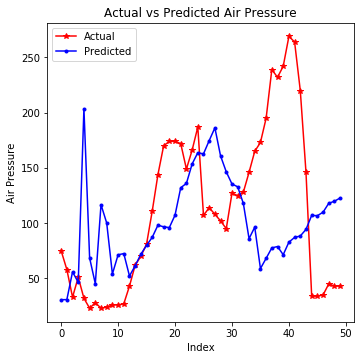

In [183]:
k = df_val['pm2.5']
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), k.loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_CO2[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
#plt.savefig('plots/ch5/B07887_05_05.png', format='png', dpi=300)